In [43]:
#packages import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [27]:
#import data
OrchardInfo = pd.read_csv("VeganBerry_Raw_data_Pt_2_2.csv")

In [29]:
OrchardInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Week                           156 non-null    int64  
 1   Fertilizer added (cubic feet)  3 non-null      float64
 2   Fertilizer measured            156 non-null    float64
 3   Mulch added                    6 non-null      float64
 4   Mulch measured                 156 non-null    float64
 5   Rain                           156 non-null    float64
 6   Watering                       78 non-null     float64
 7   Nutrition Lvl                  156 non-null    int64  
 8   Moisture                       156 non-null    int64  
 9   Temp                           156 non-null    int64  
 10  Weekly Yield                   156 non-null    int64  
 11  Region                         156 non-null    object 
dtypes: float64(6), int64(5), object(1)
memory usage: 1

In [31]:
Orchard = OrchardInfo[["Week","Fertilizer measured","Mulch measured","Rain","Nutrition Lvl","Moisture","Temp","Weekly Yield","Region"]]
Orchard= Orchard.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
Orchard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Week                 156 non-null    int64  
 1   Fertilizer measured  156 non-null    float64
 2   Mulch measured       156 non-null    float64
 3   Rain                 156 non-null    float64
 4   Nutrition Lvl        156 non-null    int64  
 5   Moisture             156 non-null    int64  
 6   Temp                 156 non-null    int64  
 7   Weekly Yield         156 non-null    int64  
 8   Region               156 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 11.1+ KB


Text(0.5, 0.98, 'Orchard Dataset Pairplot')

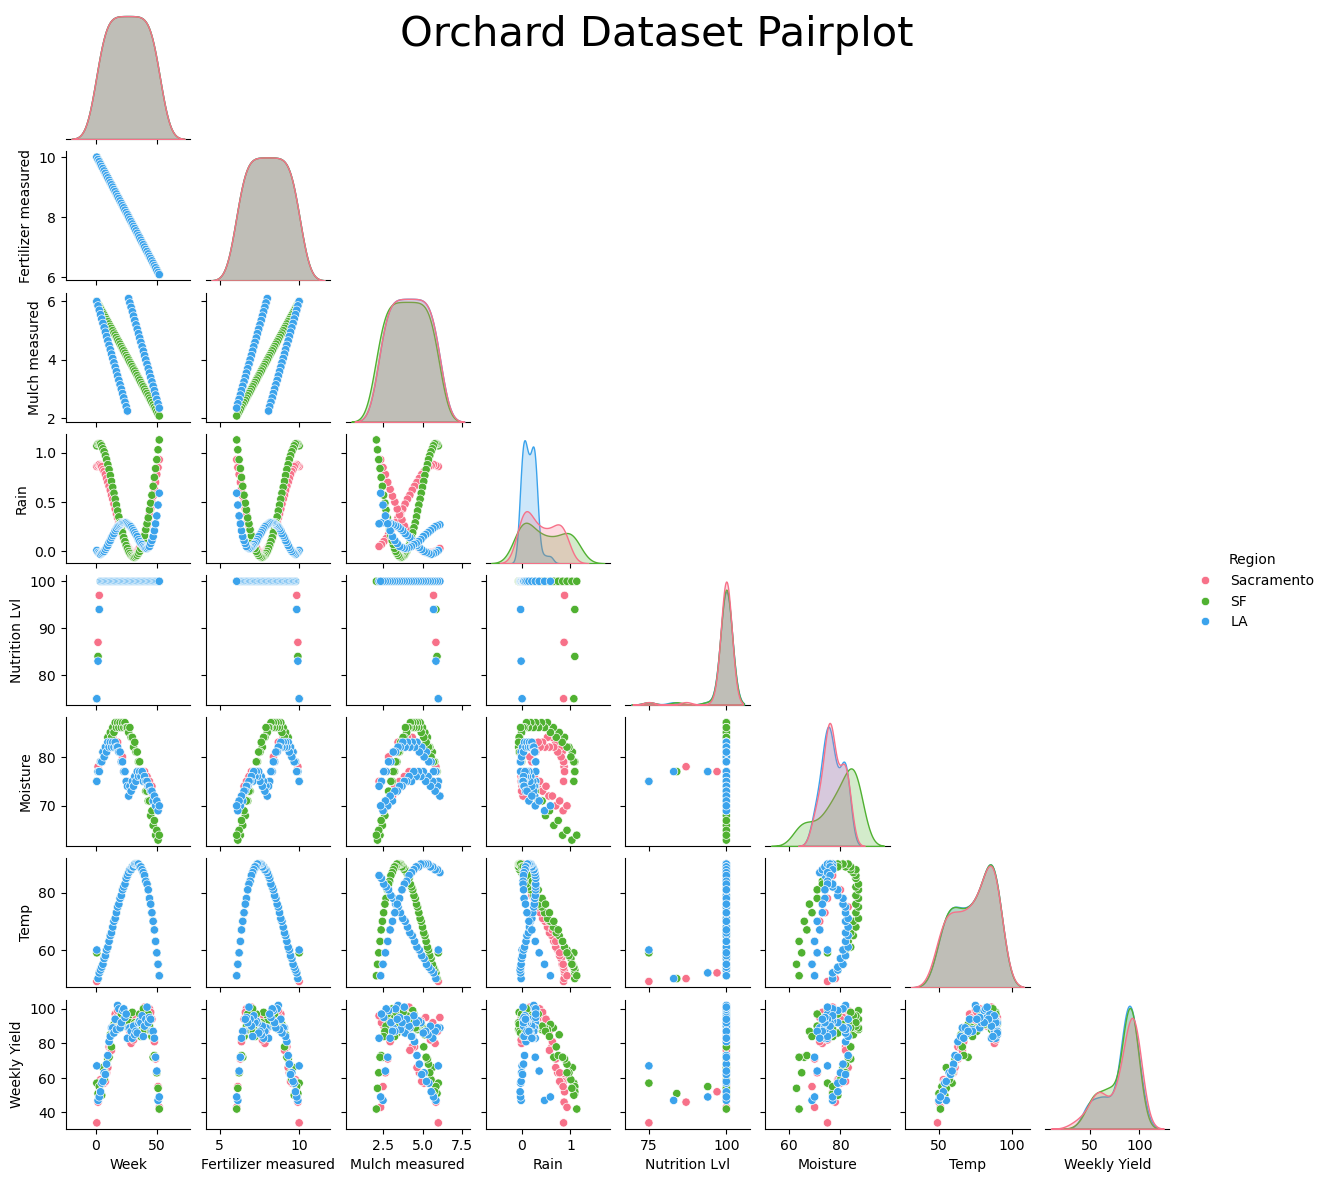

In [33]:
#pairplot of all variables broken down by orchard name
OrchardPlot = sns.pairplot(Orchard, corner = True, palette = 'husl', hue = "Region", height = 1.5)
# for title
OrchardPlot.fig.suptitle('Orchard Dataset Pairplot',fontsize = 30)

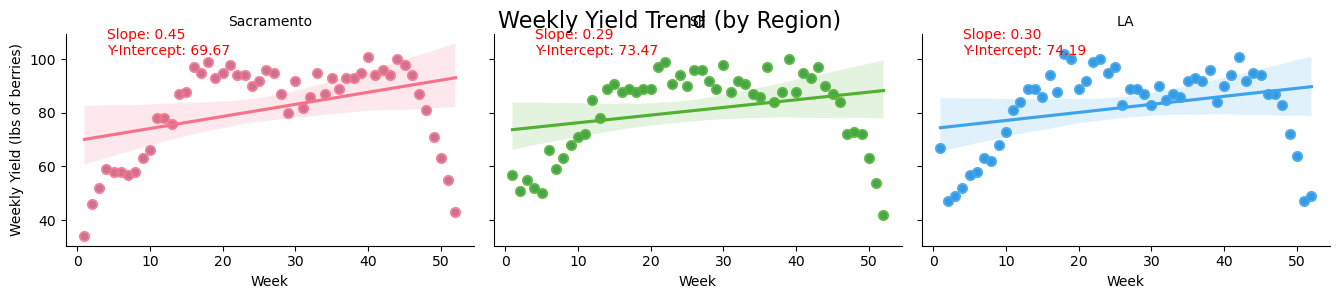

In [35]:
#Linear Regression analysis of weekly yield with y-intercept info and slope
# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Region'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Region", col_wrap=3, height=3, aspect=1.5)

# Function to calculate slope and y-intercept
def calculate_slope_intercept(x, y):
    coeffs = np.polyfit(x, y, 1)  # Fit a linear regression model
    slope = coeffs[0]
    intercept = coeffs[1]
    return slope, intercept

# Map the scatterplot to the grid
g.map(sns.scatterplot, "Week", "Weekly Yield")

# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Region'].unique()):
    subdata = Orchard[Orchard['Region'] == hue]  # Filter data for the current hue
    sns.regplot(x='Week', y='Weekly Yield', data=subdata, ax=ax, color=palette[list(Orchard['Region'].unique()).index(hue)], scatter_kws={'s': 50})
    
    # Calculate slope and y-intercept
    slope, intercept = calculate_slope_intercept(subdata['Week'], subdata['Weekly Yield'])
    
    # Annotate the slope and y-intercept on the plot
    ax.text(0.1, 0.9, f'Slope: {slope:.2f}\nY-Intercept: {intercept:.2f}', transform=ax.transAxes, fontsize=10, color='red')

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Weekly Yield Trend (by Region)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Week", "Weekly Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()


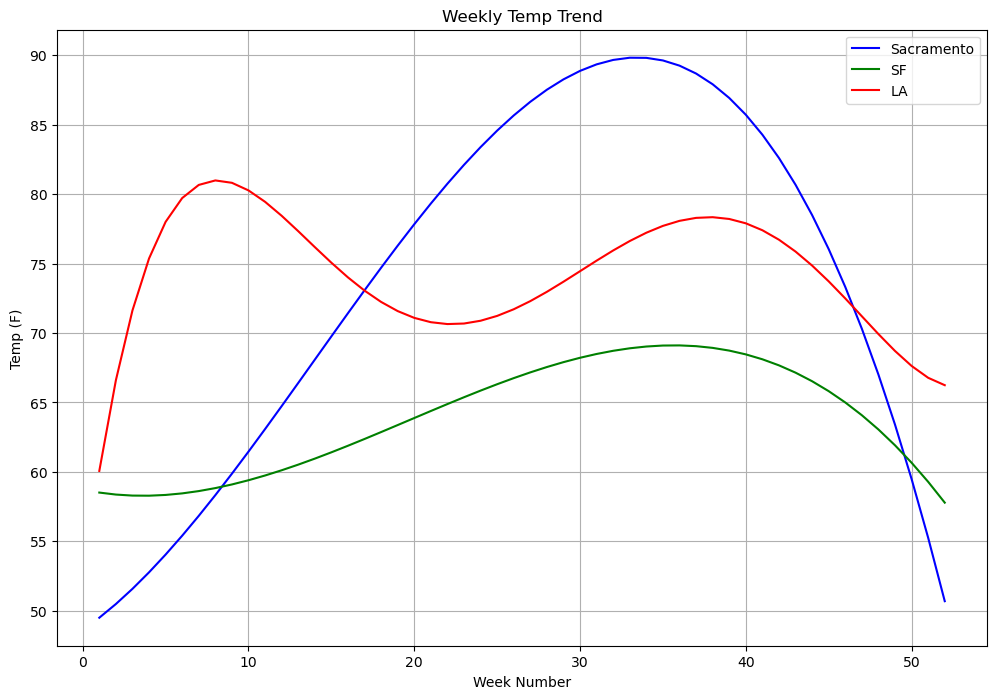

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define the week range
weeks = np.linspace(1, 52, 52)

# Define the functions
def func1(week):
    return -0.1203 * (week / 4.333) ** 3 + 1.1654 * (week / 4.333) ** 2 + 3.5118 * (week / 4.333) + 48.626

def func2(week):
    return -0.0536 * (week / 4.3333) ** 3 + 0.7288 * (week / 4.3333) ** 2 - 1.1057 * (week / 4.3333) + 58.727

def func3(week):
    return 0.0078 * (week / 4.333) ** 5 - 0.272 * (week / 4.333) ** 4 + 3.4081 * (week / 4.333) ** 3 - 18.426 * (week / 4.333) ** 2 + 39.823 * (week / 4.333) + 51.818

# Calculate the function values for each week
values1 = func1(weeks)
values2 = func2(weeks)
values3 = func3(weeks)

# Plot the functions
plt.figure(figsize=(12, 8))
plt.plot(weeks, values1, label='Sacramento', color='blue')
plt.plot(weeks, values2, label='SF', color='green')
plt.plot(weeks, values3, label='LA', color='red')
plt.xlabel('Week Number')
plt.ylabel('Temp (F)')
plt.title('Weekly Temp Trend')
plt.legend()
plt.grid(True)
plt.show()

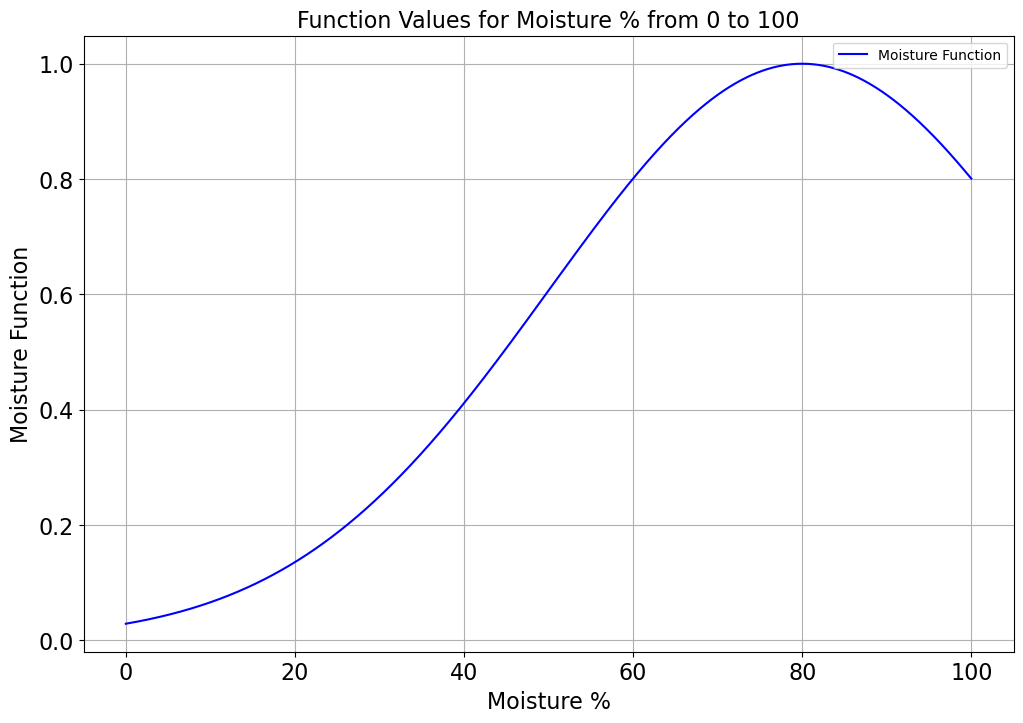

In [89]:
from scipy.stats import norm

# Define the temperature range
temp_values = np.linspace(0, 100, 1000)

# Define the mean and standard deviation
mean = 80
std_dev = 30

# Calculate the denominator (constant value)
denominator = norm.pdf(80, mean, std_dev)

# Calculate the function values
function_values = norm.pdf(temp_values, mean, std_dev) / denominator

# Plot the function
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(temp_values, function_values, label='Moisture Function', color='blue')
plt.xlabel('Moisture %', fontsize = 16)
plt.ylabel('Moisture Function', fontsize = 16)
plt.title('Function Values for Moisture % from 0 to 100', fontsize = 16)
plt.legend()
plt.grid(True)
plt.show()

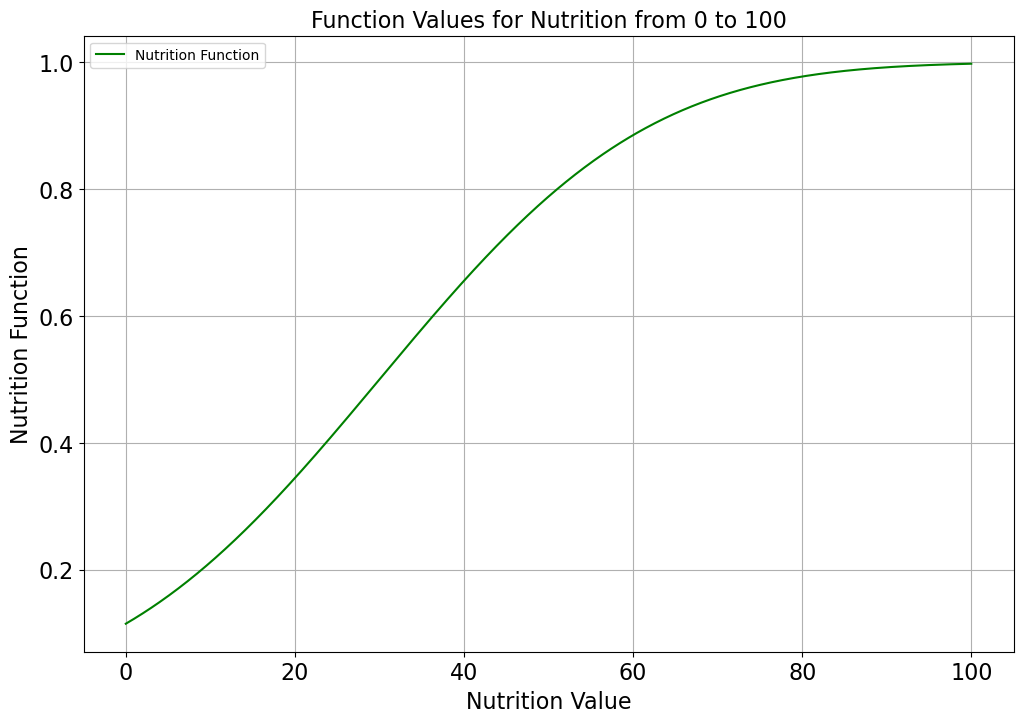

In [87]:
from scipy.stats import norm

# Define the temperature range
temp_values = np.linspace(0, 100, 1000)

# Define the mean and standard deviation
mean = 30
std_dev = 25

# Calculate the function values
function_values = norm.cdf(temp_values, mean, std_dev)

# Plot the function
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(temp_values, function_values, label='Nutrition Function', color='green')
plt.xlabel('Nutrition Value', fontsize = 16)
plt.ylabel('Nutrition Function', fontsize = 16)
plt.title('Function Values for Nutrition from 0 to 100', fontsize = 16)
plt.legend()
plt.grid(True)
plt.show()

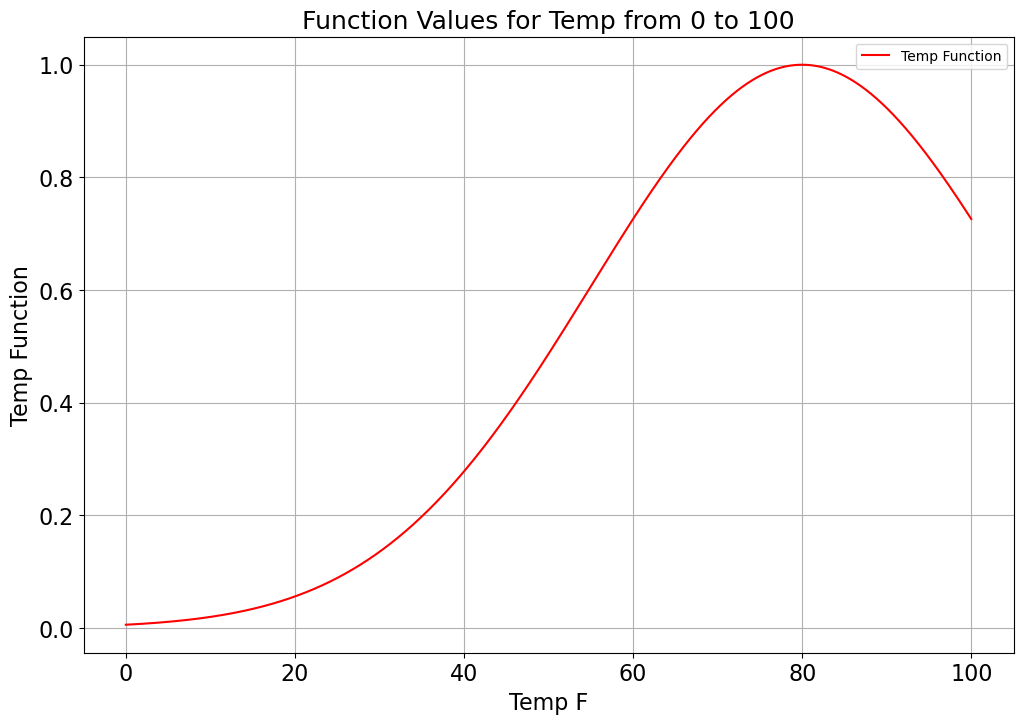

In [85]:
from scipy.stats import norm

# Define the temperature range
temp_values = np.linspace(0, 100, 1000)

# Define the mean and standard deviation
mean = 80
std_dev = 25

# Calculate the denominator (constant value)
denominator = norm.pdf(80, mean, std_dev)

# Calculate the function values
function_values = norm.pdf(temp_values, mean, std_dev) / denominator

# Plot the function
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(temp_values, function_values, label='Temp Function', color='red')
plt.xlabel('Temp F', fontsize = 16)
plt.ylabel('Temp Function', fontsize = 16)
plt.title('Function Values for Temp from 0 to 100', fontsize = 18)
plt.legend()
plt.grid(True)
plt.show()

